In [1]:
from Bio.Seq import Seq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
import matplotlib 
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [2]:
with open("/Users/claireleblanc/Documents/tools_software/paml4.8/cerevisiae_6/mc.paml", 'r') as f:
    lines = f.readlines()

In [3]:
sequences = []
for line in lines:
    if line.startswith("S"):
        sequence = "".join(line.split()[1:])
        prot = Seq(sequence)
        sequence = str(prot.translate())
        sequences.append(sequence)


In [4]:
with open("evolver_simulation_6_neutral.fasta", "w+") as f:
    for i, line in enumerate(sequences):
        f.write(f">simulation{i}\n{line}\n")

# Read the predictions

In [5]:
preds_01 = pd.read_csv("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/simulations/evolver_simulation_0.1TADA_preds.csv", converters={'tada_centers' : pd.eval, 'tada_preds' : pd.eval})

preds_01 = pd.read_csv("evolver_simulation_0.1_neutralTADA_preds.csv", converters={'tada_centers' : pd.eval, 'tada_preds' : pd.eval})

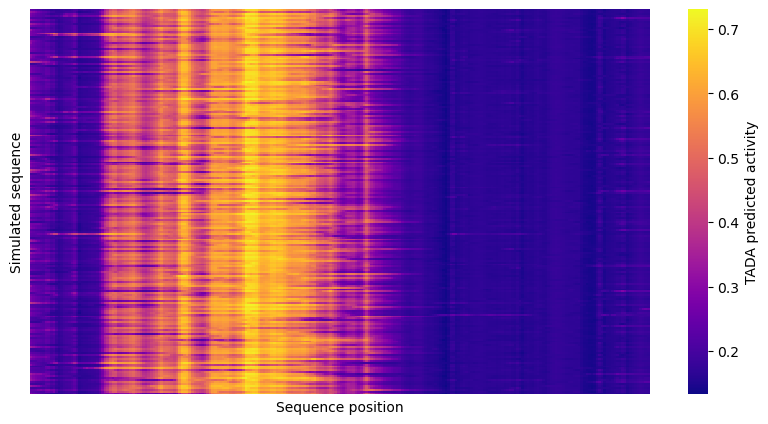

In [6]:
preds_01['active'] =  [[l if l > 0.4 else 0.0 for l in ls] for ls in preds_01['tada_preds']]
preds_01['active'] =  [[l  for l in ls] for ls in preds_01['tada_preds']]

import seaborn as sns

# Step 1: Find the maximum length of arrays
max_length = max(preds_01['active'].apply(len))

preds_01['length'] = preds_01['active'].apply(len)
preds_sorted = preds_01.sort_values(by='length', ascending=False).reset_index(drop=True)


# Step 2: Pad arrays to the maximum length
# padded_arrays = disorder_df['disorder'].apply(lambda x: np.pad(x, (0, max_length - len(x)), constant_values=np.nan))
padded_arrays = preds_sorted['active'].apply(
    lambda x: np.pad(x, (max_length - len(x), 0), constant_values=np.nan)
)


# Step 3: Convert to a 2D NumPy array
heatmap_data = np.vstack(padded_arrays)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=False, cmap='plasma', cbar=True, mask=np.isnan(heatmap_data),
            cbar_kws = {'label' : 'TADA predicted activity'},
            xticklabels=False,  # Turn off x-axis labels
            yticklabels=False   # Turn off y-axis labels
            )
plt.tick_params(
    left=False,         # Remove tick marks on the left (y-axis)
    bottom=False         # Remove tick marks on the bottom (x-axis)
)

plt.xlabel("Sequence position")
plt.ylabel("Simulated sequence")

# plt.title("Heatmap of Disorder")
plt.show()


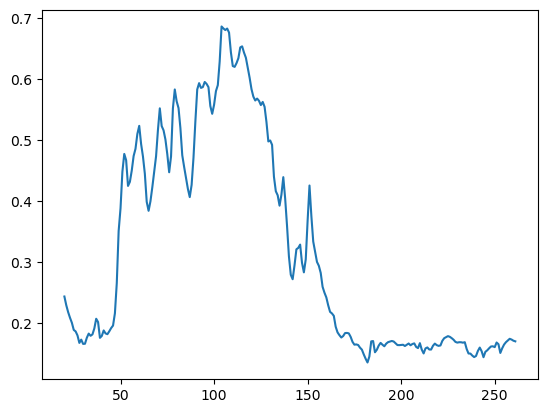

In [ ]:
plt.plot(preds_01.loc[0, 'tada_centers'], preds_01.loc[0, 'tada_preds'])

In [7]:
preds_01['any_active'] =  [any([True if l > 0.4 else 0.0 for l in ls]) for ls in preds_01['tada_preds']]
preds_01['any_active'].value_counts()

any_active
True    200
Name: count, dtype: int64

In [8]:
preds_01['active_center'] =  [any([True if l > 0.4 else 0.0 for l in ls[30:131]]) for ls in preds_01['tada_preds']]
preds_01['active_center'].value_counts()

active_center
True    200
Name: count, dtype: int64

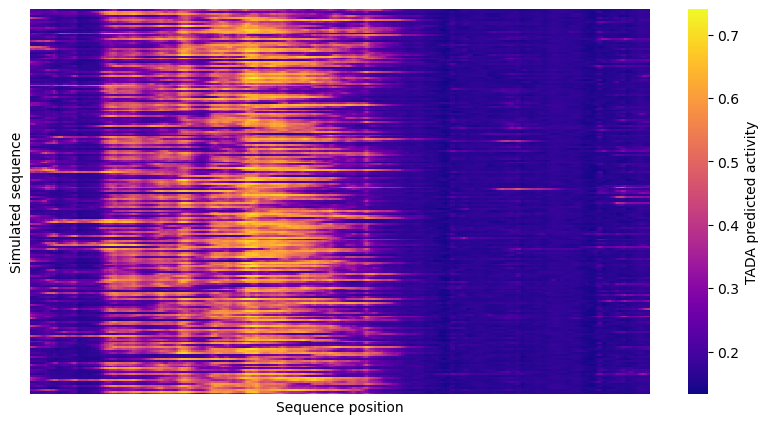

any_active
True    200
Name: count, dtype: int64

In [9]:
preds_05 = pd.read_csv("evolver_simulation_0.5_neutralTADA_preds.csv", converters={'tada_centers' : pd.eval, 'tada_preds' : pd.eval})

preds_05['active'] =  [[l if l > 0.4 else 0.0 for l in ls] for ls in preds_05['tada_preds']]
preds_05['active'] =  [[l for l in ls] for ls in preds_05['tada_preds']]

import seaborn as sns

# Step 1: Find the maximum length of arrays
max_length = max(preds_05['active'].apply(len))

preds_05['length'] = preds_05['active'].apply(len)
preds_sorted = preds_05.sort_values(by='length', ascending=False).reset_index(drop=True)


# Step 2: Pad arrays to the maximum length
# padded_arrays = disorder_df['disorder'].apply(lambda x: np.pad(x, (0, max_length - len(x)), constant_values=np.nan))
padded_arrays = preds_sorted['active'].apply(
    lambda x: np.pad(x, (max_length - len(x), 0), constant_values=np.nan)
)


# Step 3: Convert to a 2D NumPy array
heatmap_data = np.vstack(padded_arrays)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=False, cmap='plasma', cbar=True, mask=np.isnan(heatmap_data),
            cbar_kws = {'label' : 'TADA predicted activity'},
            xticklabels=False,  # Turn off x-axis labels
            yticklabels=False   # Turn off y-axis labels
            )
plt.tick_params(
    left=False,         # Remove tick marks on the left (y-axis)
    bottom=False         # Remove tick marks on the bottom (x-axis)
)

plt.xlabel("Sequence position")
plt.ylabel("Simulated sequence")

# plt.title("Heatmap of Disorder")
plt.show()

preds_05['any_active'] =  [any([True if l > 0.4 else 0.0 for l in ls]) for ls in preds_05['tada_preds']]
preds_05['any_active'].value_counts()


In [10]:
preds_05['active_center'] =  [any([True if l > 0.4 else 0.0 for l in ls[30:131]]) for ls in preds_05['tada_preds']]
preds_05['active_center'].value_counts()

active_center
True    200
Name: count, dtype: int64

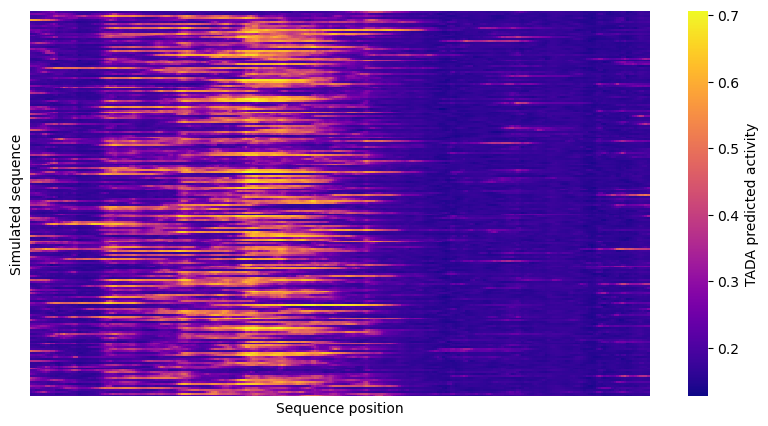

any_active
True     178
False     22
Name: count, dtype: int64

In [11]:
preds_1 = pd.read_csv("evolver_simulation_bl1_neutralTADA_preds.csv", converters={'tada_centers' : pd.eval, 'tada_preds' : pd.eval})

preds_1['active'] =  [[l if l > 0.4 else 0.0 for l in ls] for ls in preds_1['tada_preds']]
preds_1['active'] =  [[l for l in ls] for ls in preds_1['tada_preds']]

import seaborn as sns

# Step 1: Find the maximum length of arrays
max_length = max(preds_1['active'].apply(len))

preds_1['length'] = preds_1['active'].apply(len)
preds_sorted = preds_1.sort_values(by='length', ascending=False).reset_index(drop=True)


# Step 2: Pad arrays to the maximum length
# padded_arrays = disorder_df['disorder'].apply(lambda x: np.pad(x, (0, max_length - len(x)), constant_values=np.nan))
padded_arrays = preds_sorted['active'].apply(
    lambda x: np.pad(x, (max_length - len(x), 0), constant_values=np.nan)
)


# Step 3: Convert to a 2D NumPy array
heatmap_data = np.vstack(padded_arrays)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=False, cmap='plasma', cbar=True, mask=np.isnan(heatmap_data),
            cbar_kws = {'label' : 'TADA predicted activity'},
            xticklabels=False,  # Turn off x-axis labels
            yticklabels=False   # Turn off y-axis labels
            )
plt.tick_params(
    left=False,         # Remove tick marks on the left (y-axis)
    bottom=False         # Remove tick marks on the bottom (x-axis)
)

plt.xlabel("Sequence position")
plt.ylabel("Simulated sequence")

# plt.title("Heatmap of Disorder")
plt.show()

preds_1['any_active'] =  [any([True if l > 0.4 else 0.0 for l in ls]) for ls in preds_1['tada_preds']]
preds_1['any_active'].value_counts()


In [12]:
preds_1['active_center'] =  [any([True if l > 0.4 else 0.0 for l in ls[30:131]]) for ls in preds_1['tada_preds']]
preds_1['active_center'].value_counts()

active_center
True     173
False     27
Name: count, dtype: int64

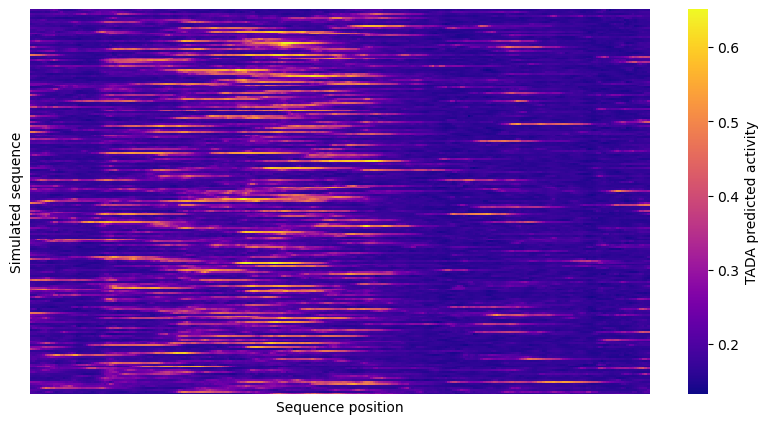

any_active
True     122
False     78
Name: count, dtype: int64

In [13]:
preds_2 = pd.read_csv("evolver_simulation_bl2_neutralTADA_preds.csv", converters={'tada_centers' : pd.eval, 'tada_preds' : pd.eval})

preds_2['active'] =  [[l if l > 0.4 else 0.0 for l in ls] for ls in preds_2['tada_preds']]
preds_2['active'] =  [[l for l in ls] for ls in preds_2['tada_preds']]

import seaborn as sns

# Step 1: Find the maximum length of arrays
max_length = max(preds_2['active'].apply(len))

preds_2['length'] = preds_2['active'].apply(len)
preds_sorted = preds_2.sort_values(by='length', ascending=False).reset_index(drop=True)


# Step 2: Pad arrays to the maximum length
# padded_arrays = disorder_df['disorder'].apply(lambda x: np.pad(x, (0, max_length - len(x)), constant_values=np.nan))
padded_arrays = preds_sorted['active'].apply(
    lambda x: np.pad(x, (max_length - len(x), 0), constant_values=np.nan)
)


# Step 3: Convert to a 2D NumPy array
heatmap_data = np.vstack(padded_arrays)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=False, cmap='plasma', cbar=True, mask=np.isnan(heatmap_data),
            cbar_kws = {'label' : 'TADA predicted activity'},
            xticklabels=False,  # Turn off x-axis labels
            yticklabels=False   # Turn off y-axis labels
            )
plt.tick_params(
    left=False,         # Remove tick marks on the left (y-axis)
    bottom=False         # Remove tick marks on the bottom (x-axis)
)

plt.xlabel("Sequence position")
plt.ylabel("Simulated sequence")

# plt.title("Heatmap of Disorder")
plt.show()

preds_2['any_active'] =  [any([True if l > 0.4 else 0.0 for l in ls]) for ls in preds_2['tada_preds']]
preds_2['any_active'].value_counts()


In [14]:
preds_2['active_center'] =  [any([True if l > 0.4 else 0.0 for l in ls[30:131]]) for ls in preds_2['tada_preds']]
preds_2['active_center'].value_counts()

active_center
True     111
False     89
Name: count, dtype: int64

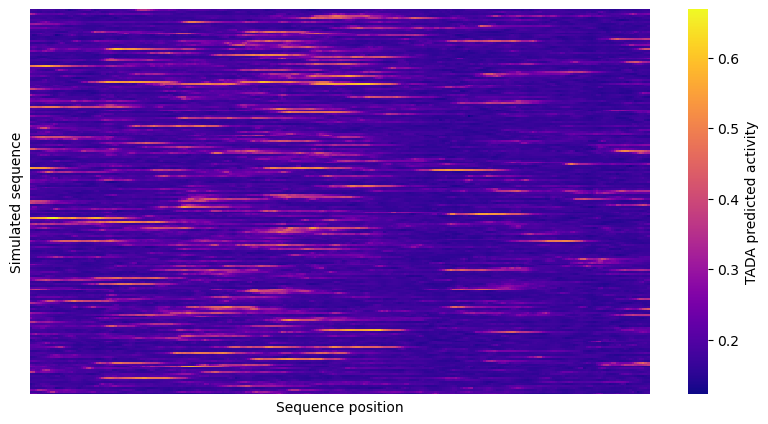

any_active
False    119
True      81
Name: count, dtype: int64

In [15]:
preds_3 = pd.read_csv("evolver_simulation_3_neutralTADA_preds.csv", converters={'tada_centers' : pd.eval, 'tada_preds' : pd.eval})

preds_3['active'] =  [[l if l > 0.4 else 0.0 for l in ls] for ls in preds_3['tada_preds']]
preds_3['active'] =  [[l for l in ls] for ls in preds_3['tada_preds']]

import seaborn as sns

# Step 1: Find the maximum length of arrays
max_length = max(preds_3['active'].apply(len))

preds_3['length'] = preds_3['active'].apply(len)
preds_sorted = preds_3.sort_values(by='length', ascending=False).reset_index(drop=True)


# Step 2: Pad arrays to the maximum length
# padded_arrays = disorder_df['disorder'].apply(lambda x: np.pad(x, (0, max_length - len(x)), constant_values=np.nan))
padded_arrays = preds_sorted['active'].apply(
    lambda x: np.pad(x, (max_length - len(x), 0), constant_values=np.nan)
)


# Step 3: Convert to a 2D NumPy array
heatmap_data = np.vstack(padded_arrays)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=False, cmap='plasma', cbar=True, mask=np.isnan(heatmap_data),
            cbar_kws = {'label' : 'TADA predicted activity'},
            xticklabels=False,  # Turn off x-axis labels
            yticklabels=False   # Turn off y-axis labels
            )
plt.tick_params(
    left=False,         # Remove tick marks on the left (y-axis)
    bottom=False         # Remove tick marks on the bottom (x-axis)
)

plt.xlabel("Sequence position")
plt.ylabel("Simulated sequence")

# plt.title("Heatmap of Disorder")
plt.show()

preds_3['any_active'] =  [any([True if l > 0.4 else 0.0 for l in ls]) for ls in preds_3['tada_preds']]
preds_3['any_active'].value_counts()



In [16]:
preds_3['active_center'] =  [any([True if l > 0.4 else 0.0 for l in ls[30:131]]) for ls in preds_3['tada_preds']]
preds_3['active_center'].value_counts()

active_center
False    136
True      64
Name: count, dtype: int64

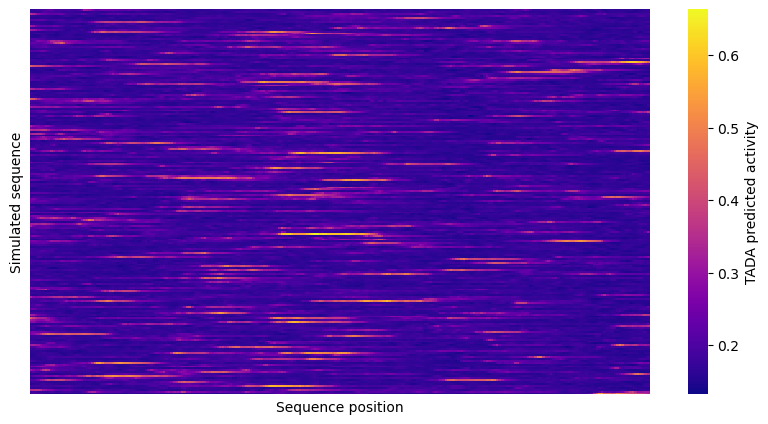

any_active
False    127
True      73
Name: count, dtype: int64

In [17]:
preds_4 = pd.read_csv("evolver_simulation_4_neutralTADA_preds.csv", converters={'tada_centers' : pd.eval, 'tada_preds' : pd.eval})

preds_4['active'] =  [[l if l > 0.4 else 0.0 for l in ls] for ls in preds_4['tada_preds']]
preds_4['active'] =  [[l for l in ls] for ls in preds_4['tada_preds']]

import seaborn as sns

# Step 1: Find the maximum length of arrays
max_length = max(preds_4['active'].apply(len))

preds_4['length'] = preds_4['active'].apply(len)
preds_sorted = preds_4.sort_values(by='length', ascending=False).reset_index(drop=True)


# Step 2: Pad arrays to the maximum length
# padded_arrays = disorder_df['disorder'].apply(lambda x: np.pad(x, (0, max_length - len(x)), constant_values=np.nan))
padded_arrays = preds_sorted['active'].apply(
    lambda x: np.pad(x, (max_length - len(x), 0), constant_values=np.nan)
)


# Step 3: Convert to a 2D NumPy array
heatmap_data = np.vstack(padded_arrays)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=False, cmap='plasma', cbar=True, mask=np.isnan(heatmap_data),
            cbar_kws = {'label' : 'TADA predicted activity'},
            xticklabels=False,  # Turn off x-axis labels
            yticklabels=False   # Turn off y-axis labels
            )
plt.tick_params(
    left=False,         # Remove tick marks on the left (y-axis)
    bottom=False         # Remove tick marks on the bottom (x-axis)
)

plt.xlabel("Sequence position")
plt.ylabel("Simulated sequence")

# plt.title("Heatmap of Disorder")
plt.show()

preds_4['any_active'] =  [any([True if l > 0.4 else 0.0 for l in ls]) for ls in preds_4['tada_preds']]
preds_4['any_active'].value_counts()



In [18]:
preds_4['active_center'] =  [any([True if l > 0.4 else 0.0 for l in ls[30:131]]) for ls in preds_4['tada_preds']]
preds_4['active_center'].value_counts()

active_center
False    160
True      40
Name: count, dtype: int64

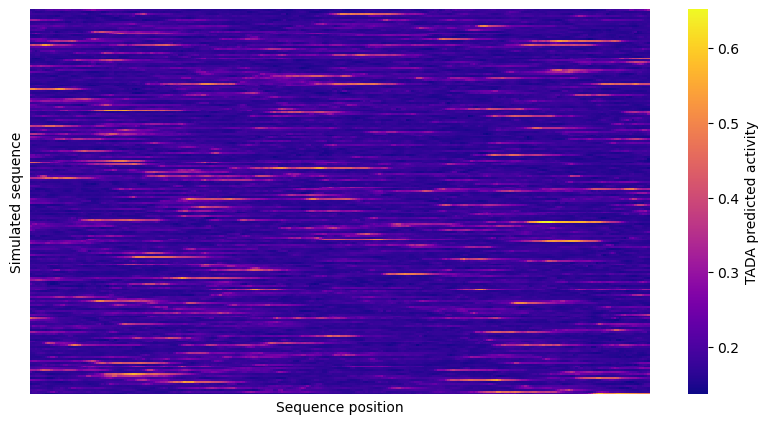

any_active
False    133
True      67
Name: count, dtype: int64

In [19]:
preds_5 = pd.read_csv("evolver_simulation_5_neutralTADA_preds.csv", converters={'tada_centers' : pd.eval, 'tada_preds' : pd.eval})

preds_5['active'] =  [[l if l > 0.4 else 0.0 for l in ls] for ls in preds_5['tada_preds']]
preds_5['active'] =  [[l for l in ls] for ls in preds_5['tada_preds']]

import seaborn as sns

# Step 1: Find the maximum length of arrays
max_length = max(preds_5['active'].apply(len))

preds_5['length'] = preds_5['active'].apply(len)
preds_sorted = preds_5.sort_values(by='length', ascending=False).reset_index(drop=True)


# Step 2: Pad arrays to the maximum length
# padded_arrays = disorder_df['disorder'].apply(lambda x: np.pad(x, (0, max_length - len(x)), constant_values=np.nan))
padded_arrays = preds_sorted['active'].apply(
    lambda x: np.pad(x, (max_length - len(x), 0), constant_values=np.nan)
)


# Step 3: Convert to a 2D NumPy array
heatmap_data = np.vstack(padded_arrays)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=False, cmap='plasma', cbar=True, mask=np.isnan(heatmap_data),
            cbar_kws = {'label' : 'TADA predicted activity'},
            xticklabels=False,  # Turn off x-axis labels
            yticklabels=False   # Turn off y-axis labels
            )
plt.tick_params(
    left=False,         # Remove tick marks on the left (y-axis)
    bottom=False         # Remove tick marks on the bottom (x-axis)
)

plt.xlabel("Sequence position")
plt.ylabel("Simulated sequence")

# plt.title("Heatmap of Disorder")
plt.show()

preds_5['any_active'] =  [any([True if l > 0.4 else 0.0 for l in ls]) for ls in preds_5['tada_preds']]
preds_5['any_active'].value_counts()



In [20]:
preds_5['active_center'] =  [any([True if l > 0.4 else 0.0 for l in ls[30:131]]) for ls in preds_5['tada_preds']]
preds_5['active_center'].value_counts()

active_center
False    168
True      32
Name: count, dtype: int64

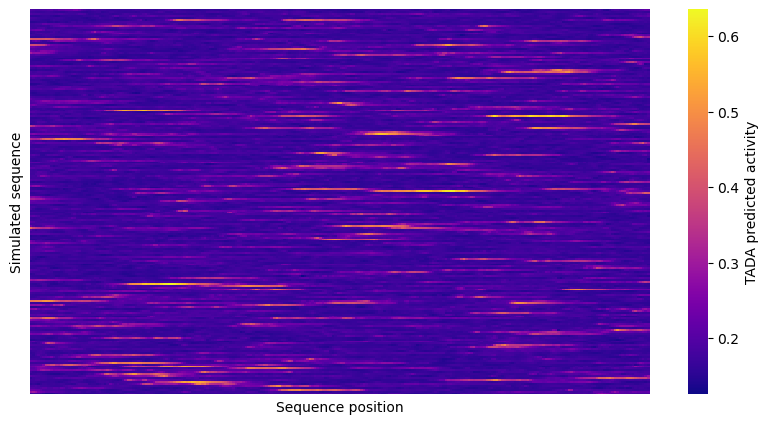

any_active
False    138
True      62
Name: count, dtype: int64

In [21]:
preds_6 = pd.read_csv("evolver_simulation_6_neutralTADA_preds.csv", converters={'tada_centers' : pd.eval, 'tada_preds' : pd.eval})

preds_6['active'] =  [[l if l > 0.4 else 0.0 for l in ls] for ls in preds_6['tada_preds']]
preds_6['active'] =  [[l for l in ls] for ls in preds_6['tada_preds']]

import seaborn as sns

# Step 1: Find the maximum length of arrays
max_length = max(preds_6['active'].apply(len))

preds_6['length'] = preds_6['active'].apply(len)
preds_sorted = preds_6.sort_values(by='length', ascending=False).reset_index(drop=True)


# Step 2: Pad arrays to the maximum length
# padded_arrays = disorder_df['disorder'].apply(lambda x: np.pad(x, (0, max_length - len(x)), constant_values=np.nan))
padded_arrays = preds_sorted['active'].apply(
    lambda x: np.pad(x, (max_length - len(x), 0), constant_values=np.nan)
)


# Step 3: Convert to a 2D NumPy array
heatmap_data = np.vstack(padded_arrays)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=False, cmap='plasma', cbar=True, mask=np.isnan(heatmap_data),
            cbar_kws = {'label' : 'TADA predicted activity'},
            xticklabels=False,  # Turn off x-axis labels
            yticklabels=False   # Turn off y-axis labels
            )
plt.tick_params(
    left=False,         # Remove tick marks on the left (y-axis)
    bottom=False         # Remove tick marks on the bottom (x-axis)
)

plt.xlabel("Sequence position")
plt.ylabel("Simulated sequence")

# plt.title("Heatmap of Disorder")
plt.show()

preds_6['any_active'] =  [any([True if l > 0.4 else 0.0 for l in ls]) for ls in preds_6['tada_preds']]
preds_6['any_active'].value_counts()



In [22]:
preds_6['active_center'] =  [any([True if l > 0.4 else 0.0 for l in ls[30:131]]) for ls in preds_6['tada_preds']]
preds_6['active_center'].value_counts()

active_center
False    164
True      36
Name: count, dtype: int64

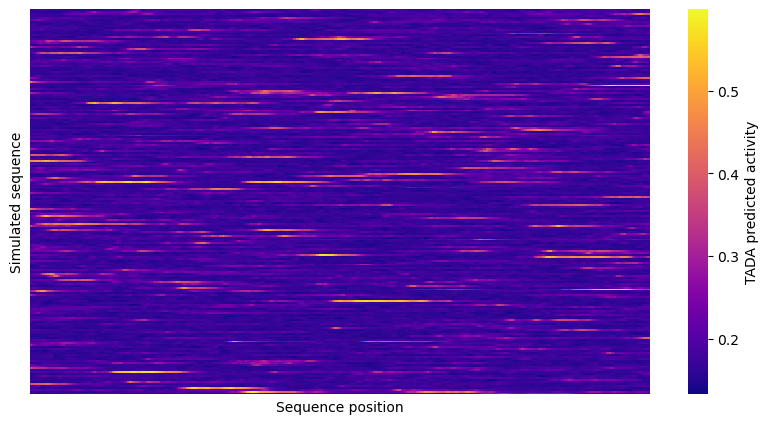

any_active
False    145
True      55
Name: count, dtype: int64

In [23]:
preds_random = pd.read_csv("evolver_simulation_random_start_neutralTADA_preds.csv", converters={'tada_centers' : pd.eval, 'tada_preds' : pd.eval})


preds_random['active'] =  [[l if l > 0.4 else 0.0 for l in ls] for ls in preds_random['tada_preds']]
preds_random['active'] =  [[l for l in ls] for ls in preds_random['tada_preds']]

import seaborn as sns

max_length = max(preds_random['active'].apply(len))

preds_random['length'] = preds_random['active'].apply(len)
preds_sorted = preds_random.sort_values(by='length', ascending=False).reset_index(drop=True)


# Step 2: Pad arrays to the maximum length
# padded_arrays = disorder_df['disorder'].apply(lambda x: np.pad(x, (0, max_length - len(x)), constant_values=np.nan))
padded_arrays = preds_sorted['active'].apply(
    lambda x: np.pad(x, (max_length - len(x), 0), constant_values=np.nan)
)


# Step 3: Convert to a 2D NumPy array
heatmap_data = np.vstack(padded_arrays)

# Step 4: Create the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=False, cmap='plasma', cbar=True, mask=np.isnan(heatmap_data),
            cbar_kws = {'label' : 'TADA predicted activity'},
            xticklabels=False,  # Turn off x-axis labels
            yticklabels=False   # Turn off y-axis labels
            )
plt.tick_params(
    left=False,         # Remove tick marks on the left (y-axis)
    bottom=False         # Remove tick marks on the bottom (x-axis)
)

plt.xlabel("Sequence position")
plt.ylabel("Simulated sequence")

# plt.title("Heatmap of Disorder")
plt.show()

preds_random['any_active'] =  [any([True if l > 0.4 else 0.0 for l in ls]) for ls in preds_random['tada_preds']]
preds_random['any_active'].value_counts()

# Looking at stability

Text(0.5, 0, '$\\Delta\\Delta G$')

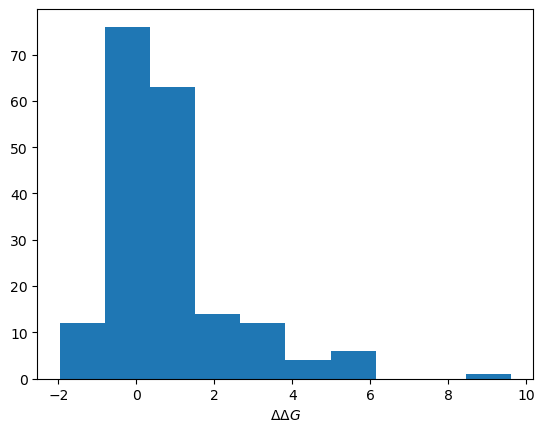

In [24]:
mutation_data = pd.read_table("/Users/claireleblanc/Documents/tools_software/foldx5_1Mac/simulation_bl0.1/Dif_gcn4_DBD.fxout", skiprows=8)
mutation_data = mutation_data.drop([0, 1, 2, 3, 4, 5])
plt.hist(mutation_data['total energy'])
plt.xlabel(r'$\Delta\Delta G$')

In [ ]:
mutation_data['folds'] = (mutation_data['total energy'] < 0.5)
mutation_data['folds'].value_counts()

folds
True     514
False    461
Name: count, dtype: int64

In [143]:
514 + 461

975

# Making the actual plot

In [25]:
# 0.1 --> 6 w/ no change
mutation_data_01 = pd.read_table("/Users/claireleblanc/Documents/tools_software/foldx5_1Mac/simulation_bl0.1/Dif_gcn4_DBD.fxout", skiprows=8)
# 0.5

# 0.5
mutation_data_05 = pd.read_table("/Users/claireleblanc/Documents/tools_software/foldx5_1Mac/simulation_bl0.5/Dif_gcn4_DBD.fxout", skiprows=8)

# 1
mutation_data_1 = pd.read_table("/Users/claireleblanc/Documents/tools_software/foldx5_1Mac/simulation_bl1/Dif_gcn4_DBD.fxout", skiprows=8)

# 2
mutation_data_2 = pd.read_table("/Users/claireleblanc/Documents/tools_software/foldx5_1Mac/simulation_bl2/Dif_gcn4_DBD.fxout", skiprows=8)

# 3
# mutation_data_2 = pd.read_table("/Users/claireleblanc/Documents/tools_software/foldx5_1Mac/simulation_bl3/Dif_gcn4_DBD.fxout", skiprows=8)

# 5
mutation_data_5 = pd.read_table("/Users/claireleblanc/Documents/tools_software/foldx5_1Mac/simulation_bl5/Dif_gcn4_DBD.fxout", skiprows=8)

In [3]:
fold_cutoff = 5
fold_01 = (6 + (mutation_data_01["total energy"] < fold_cutoff).sum()) / (6 + len(mutation_data_01["total energy"]))
fold_05 = (mutation_data_05["total energy"] < fold_cutoff).sum() / len(mutation_data_05["total energy"])
fold_1 = (mutation_data_1["total energy"] < fold_cutoff).sum() / len(mutation_data_1["total energy"])
fold_2 = (mutation_data_2["total energy"] < fold_cutoff).sum() / len(mutation_data_2["total energy"])
fold_5 = (mutation_data_5["total energy"] < fold_cutoff).sum() / len(mutation_data_5["total energy"] < fold_cutoff)

folds = [fold_01, fold_05, fold_1, fold_2, fold_5]
fold_centers = [0.1, 0.5, 1, 2, 5]

In [26]:
percent_active = [preds_01['any_active'].sum() / 200, preds_05['any_active'].sum() / 200, preds_1['any_active'].sum() / 200, preds_2['any_active'].sum() / 200, preds_3['any_active'].sum() / 200, preds_4['any_active'].sum() / 200, preds_5['any_active'].sum() / 200, preds_6['any_active'].sum() / 200]
percent_active_center = [preds_01['active_center'].sum() / 200, preds_05['active_center'].sum() / 200, preds_1['active_center'].sum() / 200, preds_2['active_center'].sum() / 200, preds_3['active_center'].sum() / 200, preds_4['active_center'].sum() / 200, preds_5['active_center'].sum() / 200, preds_6['active_center'].sum() / 200]
centers = [0.1, 0.5, 1, 2, 3, 4, 5, 6]


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


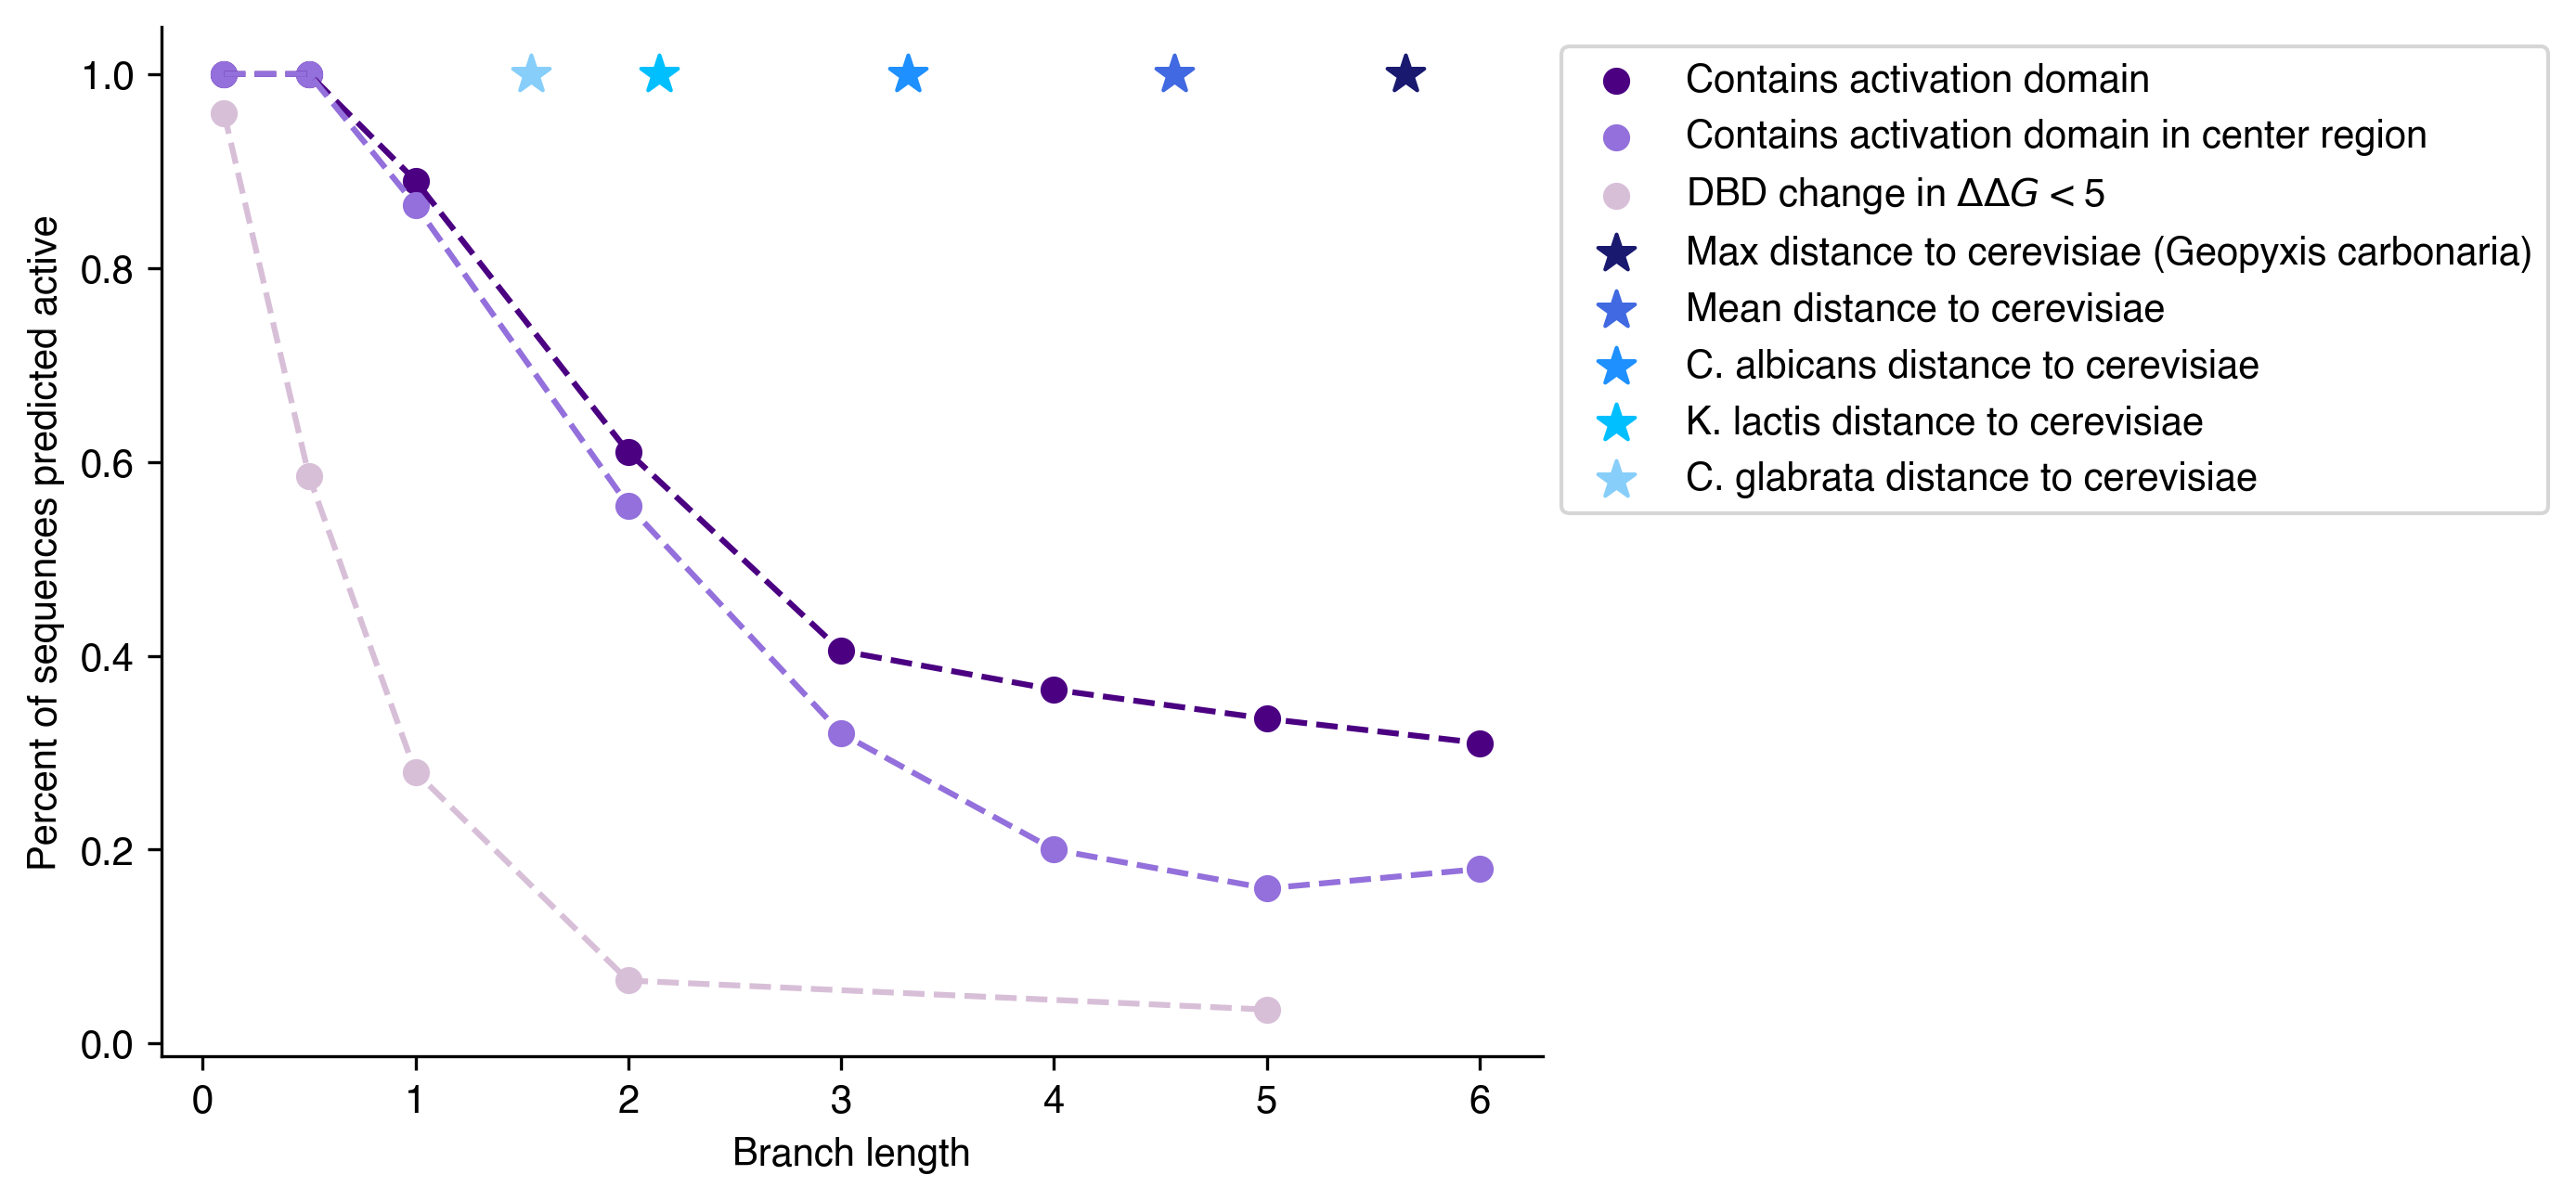

In [29]:
max_dist = 5.652862353
mean_dist = 4.565663080171465
glabrata_dist = 1.5446569715999998
albicans_dist = 3.3154448821000004
lactis_dist = 2.1461783905

plt.scatter(centers, percent_active, label="Contains activation domain", color='#4B0082')
plt.plot(centers, percent_active, linestyle='--', color='#4B0082')

plt.scatter(centers, percent_active_center, label="Contains activation domain in center region", color='#9370DB')
plt.plot(centers, percent_active_center, linestyle='--', color='#9370DB')

plt.scatter(fold_centers, folds, label=r"DBD change in $\Delta \Delta G$ < 5", color='#D8BFD8')
plt.plot(fold_centers, folds, linestyle='--', color='#D8BFD8')

# plt.scatter(DBD_centers, DBD_folds, label="Contains stable DBD") # Defined as a mutation with a delta delta G less than 0.5

plt.scatter(max_dist, [1], label="Max distance to cerevisiae (Geopyxis carbonaria)", marker='*', s=100, color='#191970')
plt.scatter(mean_dist, [1], label="Mean distance to cerevisiae", marker='*', s=100, color='#4169E1')
plt.scatter(albicans_dist, [1], label="C. albicans distance to cerevisiae", marker='*', s=100, color='#1E90FF')
plt.scatter(lactis_dist, [1], label="K. lactis distance to cerevisiae", marker='*', s=100, color='#00BFFF')
plt.scatter(glabrata_dist, [1], label="C. glabrata distance to cerevisiae", marker='*', s=100, color='#87CEFA')




plt.xlabel("Branch length")
plt.ylabel("Percent of sequences predicted active")
plt.legend(bbox_to_anchor = (1,1))
sns.despine()

plt.savefig("simulation_summary.pdf", format='pdf', bbox_inches='tight')